Here is dataset link:
https://www.kaggle.com/datasets/omkargurav/face-mask-dataset?resource=download

In [2]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset='/content/archive.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('the dataset is extracted')

the dataset is extracted


In [3]:
!ls

2.png  archive.zip  data  download.png	sample_data


**<!-- importing the dependanties -->**

**importing the dependanties**

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [5]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_709.jpg', 'with_mask_1071.jpg', 'with_mask_1827.jpg', 'with_mask_1197.jpg', 'with_mask_3616.jpg']
['with_mask_488.jpg', 'with_mask_3563.jpg', 'with_mask_1466.jpg', 'with_mask_1990.jpg', 'with_mask_2617.jpg']


In [6]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2053.jpg', 'without_mask_3682.jpg', 'without_mask_1622.jpg', 'without_mask_3231.jpg', 'without_mask_759.jpg']
['without_mask_2586.jpg', 'without_mask_1312.jpg', 'without_mask_2164.jpg', 'without_mask_3414.jpg', 'without_mask_3212.jpg']


In [7]:
print('number of with mask',len(with_mask_files))
print('number of with without mask',len(without_mask_files))

number of with mask 3725
number of with without mask 3828


**Creating Labels for the two class of images**
with mask-->0
without mask-->1


In [8]:
# create the labels
with_mask_label=[0]* 3725
without_mask_label=[1]* 3828

In [9]:
print(with_mask_label[0:5])
print(without_mask_label[0:5])

[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [10]:
print(len(with_mask_label))
print(len(without_mask_label))

3725
3828


In [11]:
labels=with_mask_label+without_mask_label
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


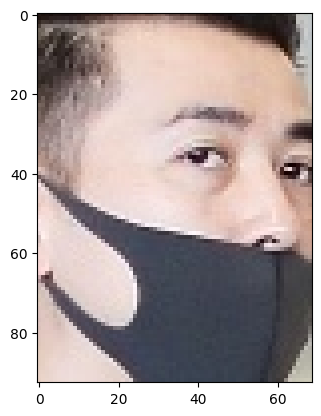

In [12]:
# displaying with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_709.jpg')
plt.imshow(img)
plt.show()

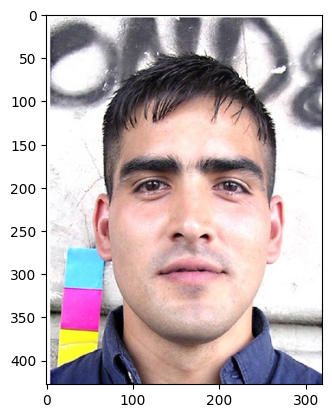

In [13]:
# displaying with mask image
img=mpimg.imread('/content/data/without_mask/without_mask_3682.jpg')
plt.imshow(img)
plt.show()

**Image processing**

1)rezie the images
2)convert the images to numpy array

In [14]:
# convert images to numpy array
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'
for img_file in without_mask_files:
  image=Image.open(without_mask_path+img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


array([[[ 33,  22,  18],
        [ 32,  21,  17],
        [ 28,  17,  13],
        ...,
        [190, 195, 192],
        [191, 197, 196],
        [192, 198, 199]],

       [[ 31,  20,  16],
        [ 31,  20,  16],
        [ 30,  19,  15],
        ...,
        [192, 197, 195],
        [191, 197, 196],
        [191, 197, 197]],

       [[ 35,  24,  20],
        [ 37,  26,  22],
        [ 42,  31,  27],
        ...,
        [196, 200, 199],
        [192, 198, 198],
        [190, 196, 196]],

       ...,

       [[232, 210, 199],
        [233, 210, 199],
        [233, 212, 201],
        ...,
        [192, 190, 175],
        [194, 192, 177],
        [195, 193, 178]],

       [[232, 210, 197],
        [233, 210, 198],
        [235, 212, 201],
        ...,
        [198, 195, 179],
        [199, 196, 181],
        [200, 197, 181]],

       [[231, 209, 195],
        [232, 210, 197],
        [235, 212, 201],
        ...,
        [205, 202, 184],
        [205, 201, 184],
        [204, 201, 184]]], dtype=uint8)
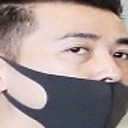

In [15]:
data[0]

In [16]:
type(data[0])

numpy.ndarray

In [17]:
data[0].shape

(128, 128, 3)

In [18]:
# converting image list and label list to numpy array
x=np.array(data)
y=np.array(labels)

In [19]:
type(x)

numpy.ndarray

In [20]:
type(y)

numpy.ndarray

In [21]:
print(x.shape)

(7553, 128, 128, 3)


In [22]:
print(y.shape)

(7553,)


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(7553, 128, 128, 3)
(6042, 128, 128, 3)
(1511, 128, 128, 3)


In [25]:
# scaling the data
x_train_scaled=x_train/225
x_test_scaled=x_test/225

In [26]:
x_train_scaled[0]

array([[[1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333]],

       [[1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333]],

       [[1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        ...,
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333]],

       ...,

       [[1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1.13333333, 1.13333333],
        [1.13333333, 1

**building a convolutional Neural Networks(CCN)**

In [1]:
import tensorflow as tf
from tensorflow import keras

In [27]:
num_of_classes=2
model=keras.Sequential([
  keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2,2)),
  keras.layers.Flatten(),
  keras.layers.Dense(128,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(64,activation='relu'),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(num_of_classes,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
# compling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
# traning the neural network
history=model.fit(x_train_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.6341 - loss: 0.7114 - val_accuracy: 0.8678 - val_loss: 0.3165
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.8786 - loss: 0.3094 - val_accuracy: 0.8793 - val_loss: 0.3140
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9139 - loss: 0.2348 - val_accuracy: 0.9124 - val_loss: 0.2140
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9202 - loss: 0.1983 - val_accuracy: 0.9058 - val_loss: 0.2396
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9383 - loss: 0.1726 - val_accuracy: 0.9256 - val_loss: 0.2041


In [30]:
# model evaluation
loss,accuracy=model.evaluate(x_test_scaled,y_test)
print('test accuracy=',accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9217 - loss: 0.2160
test accuracy= 0.921244204044342


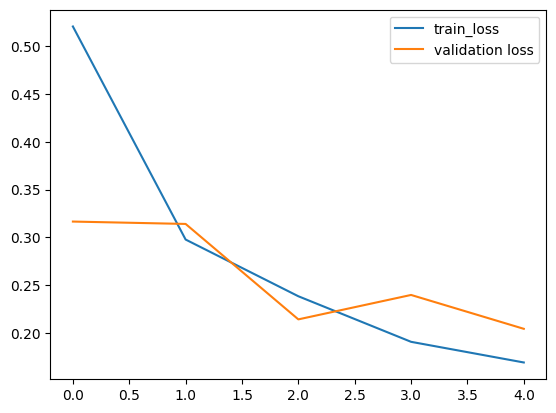

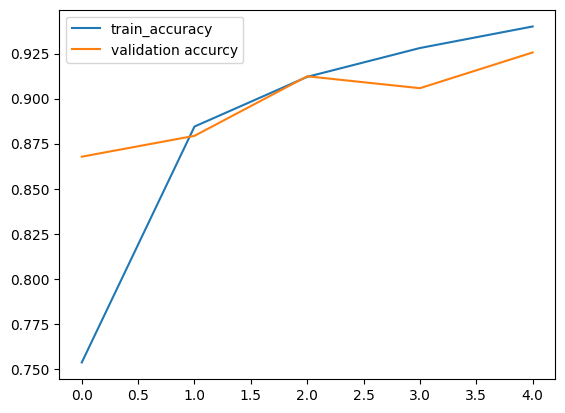

In [31]:
# plot the loss value
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend()
plt.show()
# plot the accuracy value
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='validation accurcy')
plt.legend()
plt.show()

**predctive system**

Path of the image to be predicted: /content/download.png


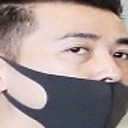

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
[[0.98865974 0.12085576]]
0
The person in the image is wearing a mask


In [34]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

# Check if the image was loaded successfully
if input_image is None:
  print(f"Error: Could not load image from {input_image_path}. Please provide a valid image file path.")
else:
  cv2_imshow(input_image)

  input_image_resized = cv2.resize(input_image, (128,128))

  # Scaling the image by 225.0 for consistency with training data scaling
  input_image_scaled = input_image_resized/225.0

  input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

  input_prediction = model.predict(input_image_reshaped)

  print(input_prediction)

  input_pred_label = np.argmax(input_prediction)

  print(input_pred_label)

  # Interpret the prediction based on the corrected labels (0: with mask, 1: without mask)
  if input_pred_label == 0:
    print('The person in the image is wearing a mask')
  else:
    print('The person in the image is not wearing a mask')